###Loading the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/EMR/Processed_patient_post_op_complications.csv')

In [27]:
df

,LOG_ID,MRN,SMRTDTA_ELEM_VALUE,CONTEXT_NAME_encoded,Post_OP_type_AN ADMINISTRATIVE,Post_OP_type_AN AIRWAY,Post_OP_type_AN CARDIOVASCULAR,Post_OP_type_AN CHRONIC PAIN,Post_OP_type_AN INJURY/INFECTION,Post_OP_type_AN MEDICATION,Post_OP_type_AN METABOLIC,Post_OP_type_AN NEUROLOGICAL,Post_OP_type_AN AQI,Post_OP_type_ANE OTHER,Post_OP_type_ANE REGIONAL,Post_OP_type_ANE RESPIRATORY,SMRTDTA_embeddings
0,b00c588406aae5cc,1a42f0bed60c5598,missing,0,0,0,0,0,0,0,0,0,1,0,0,0,[]
1,a16571d21874c0a7,596a6dc60f54a0bb,missing,1,0,0,0,0,0,0,0,0,1,0,0,0,[]
2,a16571d21874c0a7,596a6dc60f54a0bb,missing,1,0,0,0,0,0,0,0,0,1,0,0,0,[]
3,1d9ff2d157fa4c86,60e6ea6cf06b58d7,missing,2,0,0,0,0,0,0,0,0,1,0,0,0,[]
4,2ae43a4a39735956,59c5483e0654e105,other,0,0,0,0,0,0,0,0,0,1,0,0,0,[-1.00854790e+00 5.63978493e-01 5.91462553e-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203940,41e9d0fc85705586,a7b31506e6207021,missing,0,0,0,0,0,0,0,0,0,1,0,0,0,[]
203941,c998b4d14118fdf8,3f1772becaaebb81,missing,0,0,0,0,0,0,0,0,0,1,0,0,0,[]
203942,689a22b76d123ff6,65c32dd7fd5e35e7,missing,0,0,0,0,0,0,0,0,0,1,0,0,0,[]
203943,58a3296cc7491dd2,f7fc111bcf19de88,missing,0,0,0,0,0,0,0,0,0,1,0,0,0,[]


In [5]:
one_hot_encoded_columns = df.columns[df.isin([0, 1]).all()]
label_frequencies = df[one_hot_encoded_columns].sum()

In [21]:
label_frequencies.index = label_frequencies.index.str.strip()

In [26]:
label_frequencies

,0
Post_OP_type_AN ADMINISTRATIVE,118
Post_OP_type_AN AIRWAY,375
Post_OP_type_AN CARDIOVASCULAR,866
Post_OP_type_AN CHRONIC PAIN,32
Post_OP_type_AN INJURY/INFECTION,117
Post_OP_type_AN MEDICATION,94
Post_OP_type_AN METABOLIC,154
Post_OP_type_AN NEUROLOGICAL,147
Post_OP_type_ANE OTHER,1094
Post_OP_type_ANE REGIONAL,61


In [23]:
label_frequencies = label_frequencies.drop(labels='Post_OP_type_AN AQI')


In [63]:
indices=[each.split()[1] for each in label_frequencies.index]

###Ploting a bar graph of the frequency of different Post Operative complications (Occured due to which reason)

<ipython-input-67-7662fd8b9ff5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=indices, y=label_frequencies.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

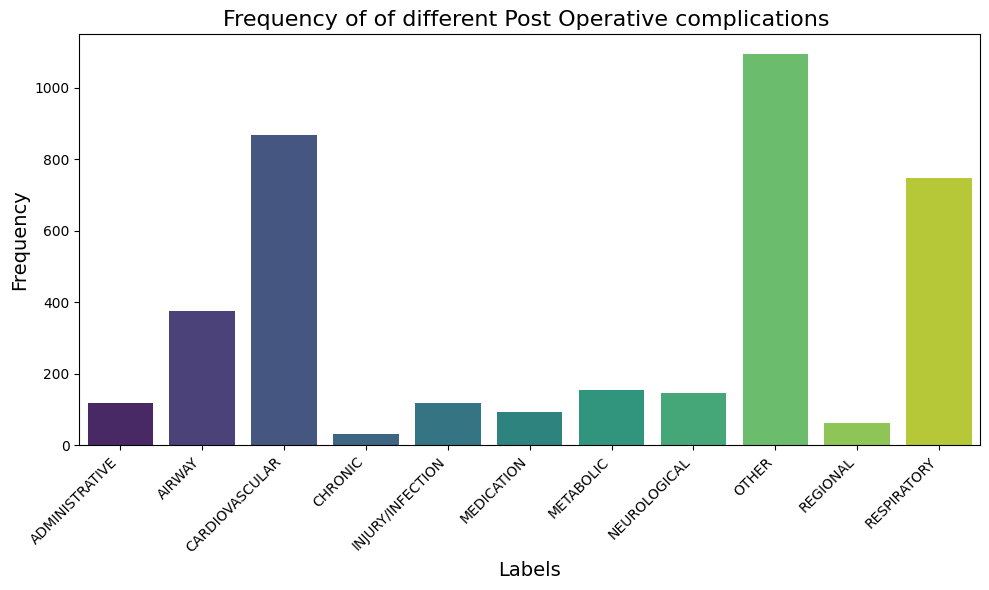

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x=indices, y=label_frequencies.values, palette="viridis")

plt.title('Frequency of of different Post Operative complications ', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Labels', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### we can see from the above plot that most of the complications are occured in either Cardiovascular or Respiratory divisions where there are many cases marked as Others

In [51]:
df_p_info = pd.read_csv('/content/drive/MyDrive/EMR/Patient_information_cleaned.csv')


In [52]:
df_p_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64124 entries, 0 to 64123
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LOG_ID                         64124 non-null  object 
 1   MRN                            64124 non-null  object 
 2   DISCH_DISP_C                   64122 non-null  float64
 3   DISCH_DISP                     64122 non-null  object 
 4   LOS                            64124 non-null  float64
 5   ICU_ADMIN_FLAG                 64124 non-null  int64  
 6   SURGERY_DATE                   64124 non-null  object 
 7   BIRTH_DATE                     64124 non-null  int64  
 8   WEIGHT                         64124 non-null  float64
 9   SEX                            64124 non-null  int64  
 10  PRIMARY_ANES_TYPE_NM           64124 non-null  object 
 11  ASA_RATING_C                   57783 non-null  float64
 12  ASA_RATING                     57783 non-null 

In [53]:
df_p_info.describe()

,DISCH_DISP_C,LOS,ICU_ADMIN_FLAG,BIRTH_DATE,WEIGHT,SEX,ASA_RATING_C,PATIENT_CLASS_NM_ENCODED,PATIENT_CLASS_GROUP_ENCODED,OR_LOS_HOURS,AN_LOS_HOURS,HEIGHT_METRES,PRIMARY_ANES_TYPE_NM_ENCODED
count,64122.000000,64124.000000,64124.000000,64124.000000,64124.000000,64124.000000,57783.000000,64124.000000,64124.000000,58131.000000,58131.000000,64124.000000,64124.000000
mean,17.524266,7.383523,0.445060,55.246382,2747.498290,0.528180,2.711040,1.210155,0.358711,3.348499,3.348499,1.682432,2.640306
std,15.091544,14.244956,0.496976,17.521329,678.268202,0.499209,0.776438,0.772744,0.479626,2.338333,2.338333,0.095163,1.463702
min,3.000000,0.000000,0.000000,17.000000,811.290000,0.000000,1.000000,0.000000,0.000000,-16.320000,-16.320000,1.300000,0.000000
25%,15.000000,0.000000,0.000000,42.000000,2262.800000,0.000000,2.000000,1.000000,0.000000,1.700000,1.700000,1.630000,2.000000
50%,15.000000,2.000000,0.000000,57.000000,2687.850000,1.000000,3.000000,1.000000,0.000000,2.730000,2.730000,1.680000,2.000000
75%,15.000000,8.000000,1.000000,69.000000,3142.880000,1.000000,3.000000,2.000000,1.000000,4.330000,4.330000,1.730000,2.000000
max,109.000000,244.000000,1.000000,90.000000,4998.270000,1.000000,6.000000,2.000000,1.000000,27.920000,27.920000,1.980000,9.000000


In [61]:
df_p_info['PATIENT_CLASS_GROUP'].unique()

array(['Outpatient', 'Inpatient'], dtype=object)

In [54]:
df_p_info['DISCH_DISP'].value_counts()

,count
DISCH_DISP,
Home Routine,44207
Home Healthcare IP Admit Related,8045
Skilled Nursing Facility,4623
Rehab Facility (this hospital),1110
Acute Care Facility (not this hospital),1082
Expired,981
Rehab Facility (not this hospital),812
Long Term Care Facility,776
Hospice Facility,599


###Ploting a bargraph shoing how many people have opted for which type of post discharge disposition (ie where do people like to go after their discharge)

<ipython-input-68-48fa9b12260e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When group

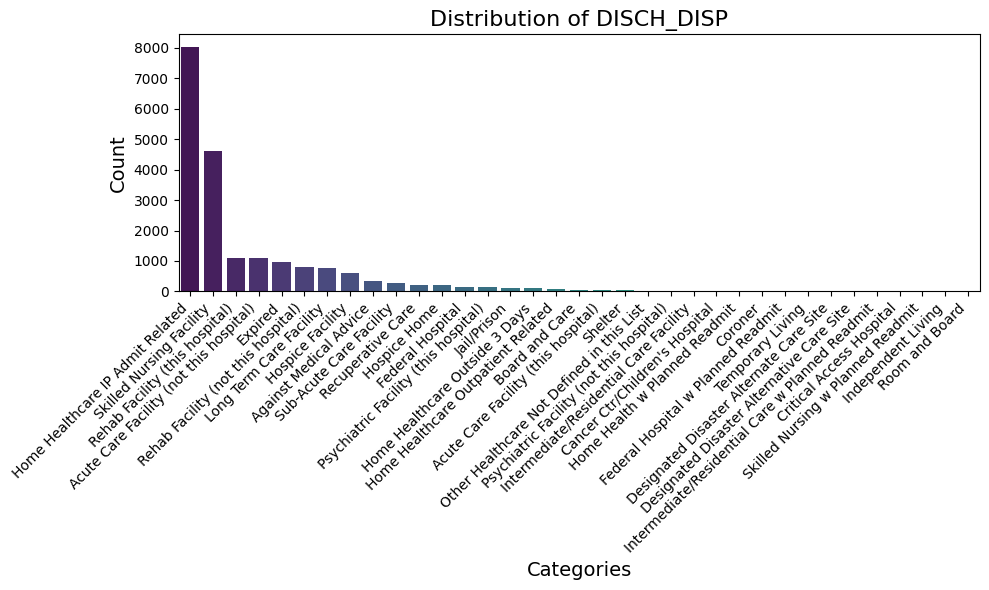

In [68]:
value_counts = df_p_info["DISCH_DISP"].value_counts()
value_counts = value_counts.drop(labels='Home Routine')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


plt.title(f'Distribution of DISCH_DISP', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

####From the Above graph we can see that most of the times people tend to go to their home and follow their home routine (excluded Home routine as it has so many number of entries) and fllowed by home with an IP admitted.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


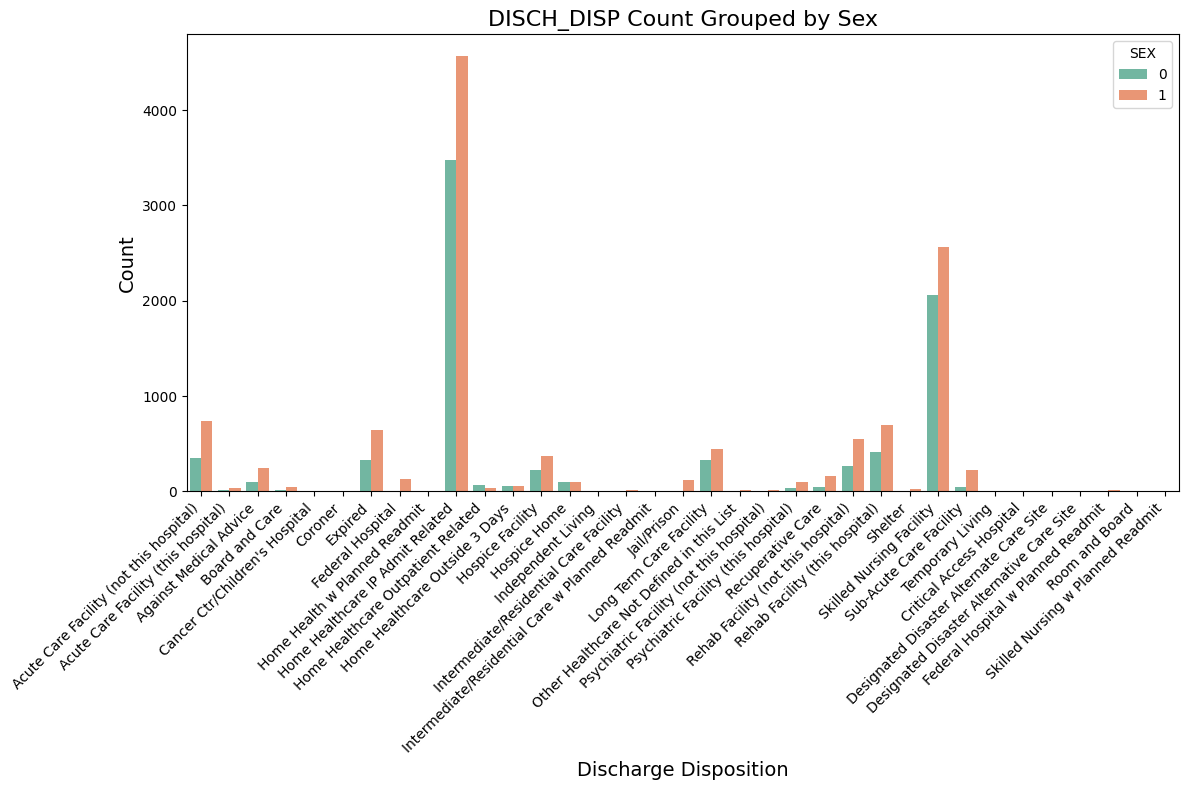

In [71]:
df_filtered = df_p_info[df_p_info['DISCH_DISP'] != 'Home Routine']
grouped_data = df_filtered.groupby(['SEX', 'DISCH_DISP']).size().reset_index(name='count')

# Step 2: Plot the double bar graph using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='DISCH_DISP', y='count', hue='SEX', data=grouped_data, palette="Set2")

# Step 3: Add titles and labels
plt.title('DISCH_DISP Count Grouped by Sex', fontsize=16)
plt.xlabel('Discharge Disposition', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Step 4: Show the plot
plt.tight_layout()
plt.show()

In [72]:
grouped_data

,SEX,DISCH_DISP,count
0,0,Acute Care Facility (not this hospital),348
1,0,Acute Care Facility (this hospital),10
2,0,Against Medical Advice,104
3,0,Board and Care,19
4,0,Cancer Ctr/Children's Hospital,8
...,...,...,...
58,1,Shelter,25
59,1,Skilled Nursing Facility,2566
60,1,Skilled Nursing w Planned Readmit,1
61,1,Sub-Acute Care Facility,222


###Now we are trying to check a relation between How long does a patient stay given his SEX and his ICU admimission

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

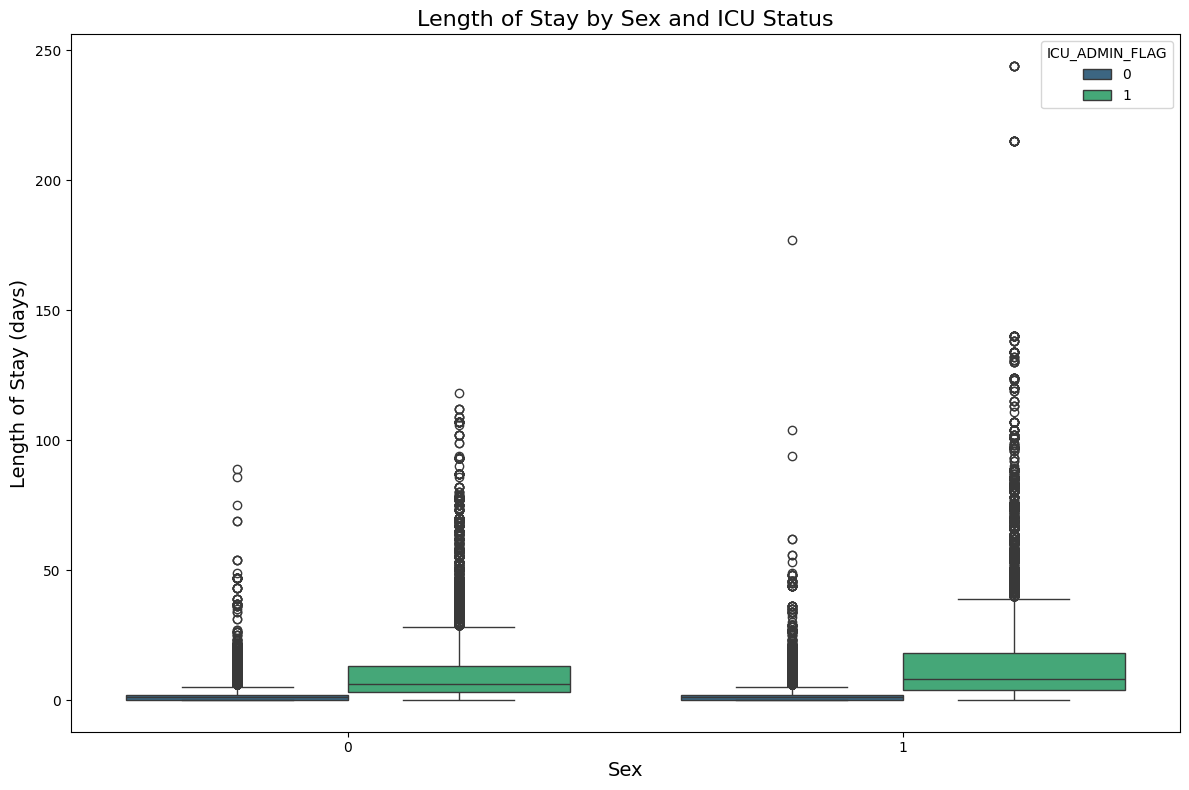

In [45]:
plt.figure(figsize=(12, 8))

# Box plot showing distribution of Length of Stay, with ICU status as hue
sns.boxplot(x='SEX', y='LOS', hue='ICU_ADMIN_FLAG', data=df_p_info, palette="viridis")

# Titles and labels
plt.title('Length of Stay by Sex and ICU Status', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Length of Stay (days)', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

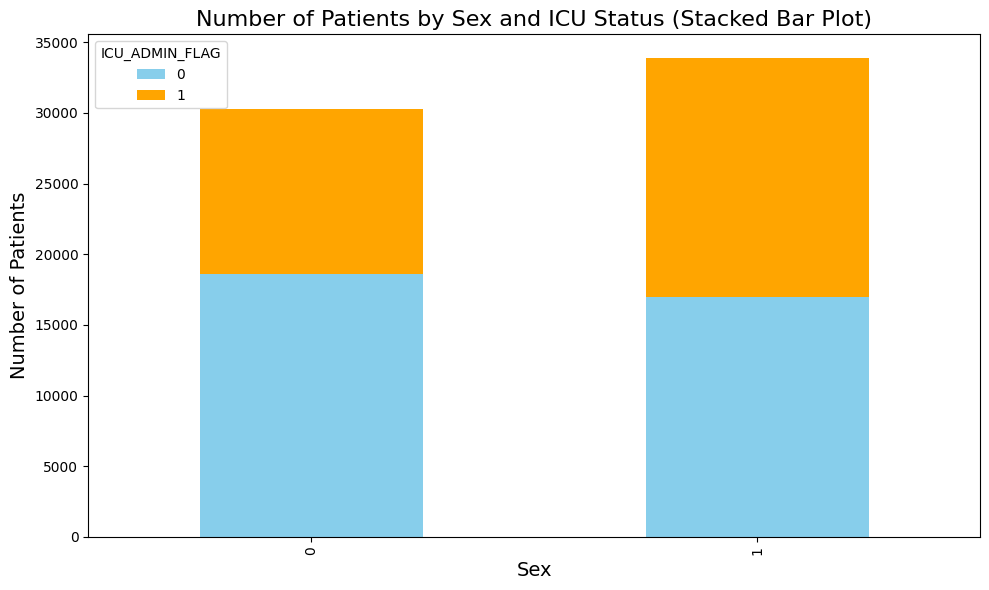

In [62]:
counts = df_p_info.groupby(['SEX', 'ICU_ADMIN_FLAG']).size().unstack()

# Step 2: Plot a stacked bar chart
counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])

# Titles and labels
plt.title('Number of Patients by Sex and ICU Status (Stacked Bar Plot)', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

###From the above 2 graphs we can see that there are more Male patients who tend to get admitted in ICU in comparision to th female patients
###we can also see that the length of stay is more in the male patients while checked with the help of female patients